In [1]:
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

from RBM import RBM
from utils import show_img
import scipy.io as sio

Using TensorFlow backend.


# Load & pre-process data

In [2]:
num_class = 10
input_shape = (28, 28, 1)

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(-1, np.prod(input_shape)).astype('float32') / 255
x_test = x_test.reshape(-1, np.prod(input_shape)).astype('float32') / 255

In [3]:
print(f"x_train: {x_train.shape} \ny_train: {y_train.shape}")

x_train: (60000, 784) 
y_train: (60000,)


In [4]:
batch = []
for i in range(num_class):
    batch.append( x_train[np.where(y_train == i)[0],] )

# Params

In [5]:
q = 10
n = np.prod(input_shape)

# Training

In [6]:
rbm = RBM(q, n)

100%|██████████| 20/20 [00:20<00:00,  1.03s/it]


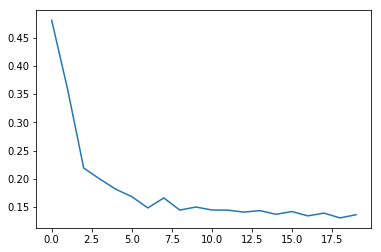

In [7]:
rbm.train(batch[6], epochs=20, lr=1e-4)

In [8]:
noise = np.random.normal(size=(1, np.prod(input_shape)))
output = noise
n_iter = 40

for _ in range(n_iter):
    output = rbm.backward(rbm.forward(output))

# Post-process data

In [9]:
img = np.squeeze(output.reshape(input_shape))

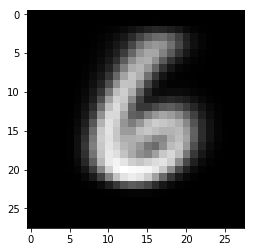

In [10]:
show_img(img)